In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
data=pd.read_csv("Zomato Dataset.csv")

In [ ]:
data.head(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
5,0x3af3,MUMRES15DEL03,29.0,4.5,19.176269,72.836721,19.266269,72.926721,02-04-2022,20:25,20:35,Sandstorms,Jam,2,Buffet,electric_scooter,1.0,No,Metropolitian,20
6,0x3aab,MYSRES01DEL01,35.0,4.0,12.311072,76.654878,12.351072,76.694878,01-03-2022,14:55,15:10,Windy,High,1,Meal,scooter,1.0,No,Metropolitian,33
7,0x689b,PUNERES20DEL01,33.0,4.2,18.592718,73.773572,18.702718,73.883572,16-03-2022,20:30,20:40,Sandstorms,Jam,2,Snack,motorcycle,1.0,No,Metropolitian,40
8,0x6f67,HYDRES14DEL01,34.0,4.9,17.426228,78.407495,17.496228,78.477495,20-03-2022,20:40,20:50,Cloudy,Jam,0,Snack,motorcycle,NaN,No,Metropolitian,41
9,0xc9cf,KOLRES15DEL03,21.0,4.7,22.552672,88.352885,22.582672,88.382885,15-02-2022,21:15,21:30,Windy,Jam,0,Meal,motorcycle,1.0,No,Urban,15


In [ ]:
data.shape

(45584, 20)

In [ ]:
data.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [ ]:
data.isnull().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,1854
Delivery_person_Ratings,1908
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,1731


In [ ]:
num_cols = [
    "Delivery_person_Age",
    "Delivery_person_Ratings",
    "multiple_deliveries"
]

for col in num_cols:
    data[col].fillna(data[col].median(), inplace=True)


/tmp/ipython-input-4001787120.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [ ]:
cat_cols = [
    "Weather_conditions",
    "Road_traffic_density",
    "Festival",
    "City"
]

for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)


/tmp/ipython-input-2469043146.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [ ]:
data.drop(columns=["Time_Orderd"], inplace=True)


In [ ]:
data.isnull().sum()


,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,1731


In [ ]:
data.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Order_picked',
       'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken (min)'],
      dtype='object')

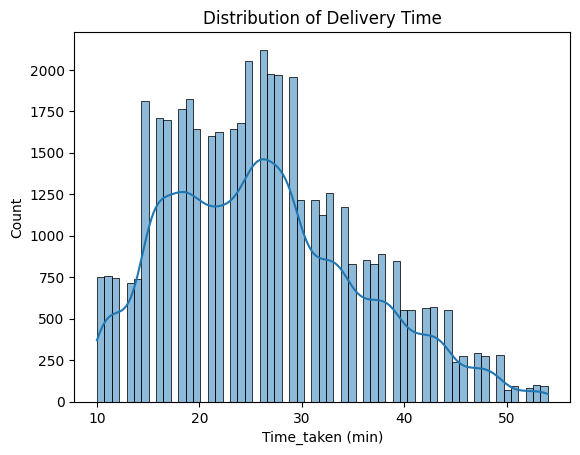

In [ ]:
sns.histplot(data["Time_taken (min)"], kde=True)
plt.title("Distribution of Delivery Time")
plt.show()


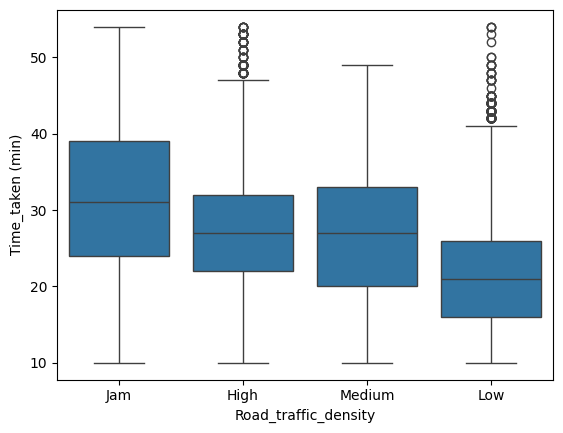

In [ ]:
sns.boxplot(
    x="Road_traffic_density",
    y="Time_taken (min)",
    data=data
)

plt.show()


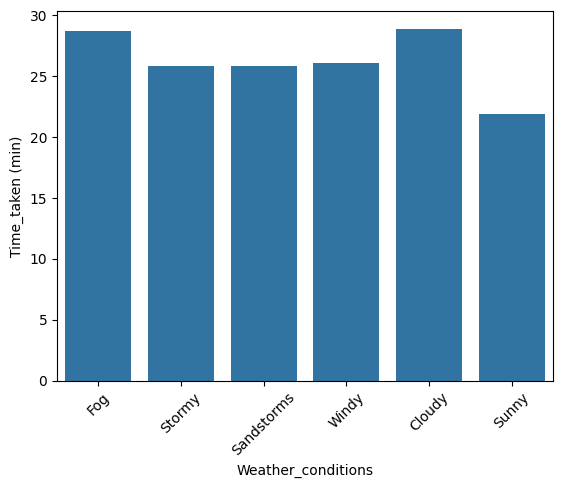

In [ ]:
sns.barplot(
    x="Weather_conditions",
    y="Time_taken (min)",
    data=data,
    estimator="mean",
    errorbar=None
)
plt.xticks(rotation=45)
plt.show()


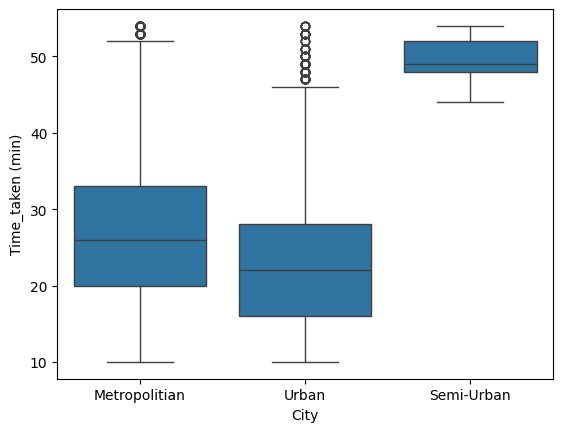

In [ ]:
sns.boxplot(
    x="City",
    y="Time_taken (min)",
    data=data
)
plt.show()


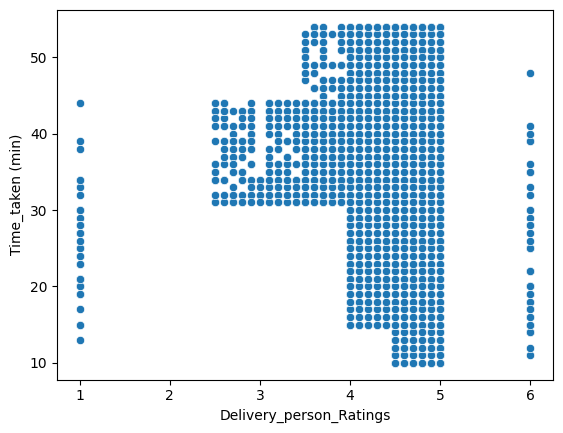

In [ ]:
sns.scatterplot(
    x="Delivery_person_Ratings",
    y="Time_taken (min)",
    data=data
)
plt.show()


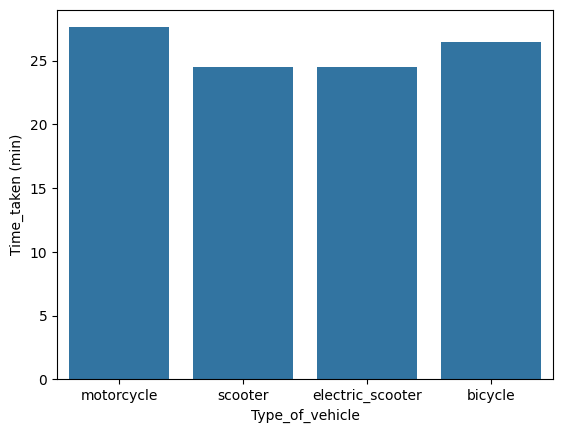

In [ ]:
sns.barplot(
    x="Type_of_vehicle",
    y="Time_taken (min)",
    data=data,
    estimator="mean",
    errorbar=None
)
plt.show()


In [ ]:
data.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Order_picked',
       'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken (min)'],
      dtype='object')

In [ ]:
y = data["Time_taken (min)"]

X = data[
    [
        "Delivery_person_Age",
        "Delivery_person_Ratings",
        "Weather_conditions",
        "Road_traffic_density",
        "Vehicle_condition",
        "Type_of_order",
        "Type_of_vehicle",
        "multiple_deliveries",
        "Festival",
        "City"
    ]
]


In [ ]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [ ]:
train_X = pd.get_dummies(train_X, drop_first=True)
val_X = pd.get_dummies(val_X, drop_first=True)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
train_preds = rf_model.predict(train_X)
val_preds = rf_model.predict(val_X)

train_mae = mean_absolute_error(train_preds, train_y)
val_mae = mean_absolute_error(val_preds, val_y)

In [30]:
print(train_mae)
print(val_mae)

1.7792961103964304
4.231252628610254


In [31]:
print(val_preds)

[38.765      25.28       25.62286025 ... 21.275      18.42
 25.38      ]
